In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# choose models  
from sklearn.linear_model import LinearRegression, LogisticRegression  
from mord import LogisticAT, LogisticIT  
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

In [24]:
#using uncleaned csv before any values were changed to string, looking back it would have been good to save a cleaned numerical version for ml

health_behaviour_df = pd.read_csv('Data/post_feat_analysis_health_behaviour.csv')

In [25]:
#Select features that looked like they influenced health in exploration
#General health was ordinal but mental health and physical health are days/month of good health
#Scikit learn doesn't have an ordinal logistic regression module so I'm going to try multiple linear regression
#on these two factors
#BMI, Education, income, vegetable consumption, alchohol, race, physical activity, strength training, age, state

In [26]:
## Predicting mental health
health_behaviour_df.columns

Index(['_STATE', 'GENHLTH', 'EXRACT11', 'ACTIN12_', 'EXRACT21', 'PAFREQ2_',
       '_MINAC21', 'ACTIN22_', 'PA2MIN_', '_BMI5', '_RFSMOK3', 'FTJUDA2_',
       '_FRUTSU1', '_VEGESU1', '_PAINDX2', '_PASTRNG', '_EDUCAG', 'INCOME2'],
      dtype='object')

In [27]:
health_behaviour_df.head()

,_STATE,GENHLTH,EXRACT11,ACTIN12_,EXRACT21,PAFREQ2_,_MINAC21,ACTIN22_,PA2MIN_,_BMI5,_RFSMOK3,FTJUDA2_,_FRUTSU1,_VEGESU1,_PAINDX2,_PASTRNG,_EDUCAG,INCOME2
0,1.0,4.0,64.0,1.0,73.0,5.000,750.0,1.0,778.0,18.54,1.0,0.00,1.00,1.21,1.0,2.0,3.0,5.0
1,1.0,3.0,2.0,2.0,64.0,1.167,70.0,1.0,190.0,31.62,1.0,0.14,1.14,1.64,1.0,1.0,4.0,7.0
2,1.0,2.0,98.0,2.0,73.0,3.000,90.0,1.0,270.0,32.98,2.0,0.20,1.20,1.34,1.0,1.0,4.0,7.0
3,1.0,2.0,64.0,1.0,18.0,0.467,84.0,2.0,468.0,22.31,2.0,0.00,2.00,3.10,1.0,1.0,4.0,7.0
4,1.0,1.0,64.0,2.0,18.0,4.000,720.0,2.0,1920.0,25.79,1.0,1.00,2.00,1.79,1.0,2.0,4.0,8.0


In [5]:
#Dont need this anymore because I'm downloading the cleaned .csv from feature_analysis now
#quick recleaning from old code
#DON'T RERUN THIS UNLESS DAATA HAS BEEN REDOWNLOADED
#health_behaviour_df.loc[health_behaviour_df.MENTHLTH == 88, "MENTHLTH"] = 0
#health_behaviour_df.loc[health_behaviour_df.MENTHLTH == 77, "MENTHLTH"] = np.NaN
#health_behaviour_df.loc[health_behaviour_df.MENTHLTH == 99, "MENTHLTH"] = np.NaN
#health_behaviour_df.loc[health_behaviour_df.PHYSHLTH == 88, "PHYSHLTH"] = 0
#health_behaviour_df.loc[health_behaviour_df.PHYSHLTH == 77, "PHYSHLTH"] = np.NaN
#health_behaviour_df.loc[health_behaviour_df.PHYSHLTH == 99, "PHYSHLTH"] = np.NaN
#health_behaviour_df.loc[health_behaviour_df.INCOME2 == 77, "INCOME2"] = np.NaN
#health_behaviour_df.loc[health_behaviour_df.INCOME2 == 99, "INCOME2"] = np.NaN
#health_behaviour_df.loc[health_behaviour_df._EDUCAG == 9, "_EDUCAG"] = np.NaN
#health_behaviour_df['_VEGESU1'] = health_behaviour_df['_VEGESU1'].div(100).round(2)
#health_behaviour_df.loc[health_behaviour_df._RFBMI5 == 9, "_RFBMI5"] = np.NaN
#health_behaviour_df['PAFREQ1_'] = health_behaviour_df['PAFREQ1_'].div(1000).round(2)
#health_behaviour_df['STRFREQ_'] = health_behaviour_df['STRFREQ_'].div(1000).round(2)
#health_behaviour_df.loc[health_behaviour_df._AGEG5YR == 14, "_AGEG5YR"] = np.NaN
#health_behaviour_df['REV_MENTHLTH'] = 30 - health_behaviour_df['MENTHLTH']
#health_behaviour_df['REV_PHYSHLTH'] = 30 - health_behaviour_df['PHYSHLTH']
#health_behaviour_df.loc[health_behaviour_df.GENHLTH == 7, "GENHLTH"] = np.NaN
#health_behaviour_df.loc[health_behaviour_df.GENHLTH == 9, "GENHLTH"] = np.NaN


## Feature Selection

Calculating correlation for each potential feature...
Data types:
'_STATE': nominal
'GENHLTH': nominal
'PHYSHLTH': ratio/discrete
'MENTHLTH': ratio/discrete
'EXRACT11': nominal
'PAFREQ1_': ratio/continuous
'_MINAC11': ratio/continuous
'ACTIN12_': nominal
'STRFREQ_': ratio/continuous
'_BMI5', ': ratio/continuous
_RFSMOK3': nominal/binary
'_RFDRHV7': nominal/binary
'_FRUTSU1': ratio/continuous
'_VEGESU1': ratio/continuous
'_PAINDX2': ratio/continuous
'_PASTRNG': ratio/continuous
'_AGEG5YR': ordinal
'_AGE80': ratio/continuous
'_IMPRACE': ordinal
'_EDUCAG': ordinal
'INCOME2': ordinal

mean=2.289 stdv=0.957


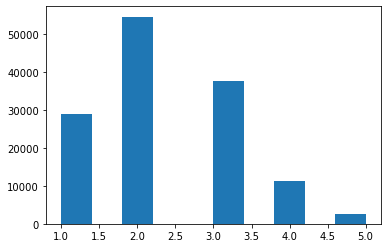

In [28]:
from numpy import mean
from numpy import std

#test distribution of ratio variables
gen_health = health_behaviour_df['GENHLTH'].dropna().values.tolist()
print('mean=%.3f stdv=%.3f' % (mean(gen_health), std(gen_health)))

from matplotlib import pyplot
pyplot.hist(gen_health)
pyplot.show()

In [29]:
health_behaviour_df.GENHLTH = pd.to_numeric(health_behaviour_df.GENHLTH).astype('Int32')


In [11]:
##Isolate features from main dataframe
# strength training, age, 
mental_ml_df = health_behaviour_df[['INCOME2', '_EDUCAG', '_VEGESU1', 'PAFREQ1_', 'STRFREQ_', '_RFBMI5', '_AGE80']] 

In [12]:
mental_ml_df.head(20)

,INCOME2,_EDUCAG,_VEGESU1,PAFREQ1_,STRFREQ_,_RFBMI5,_AGE80
0,3.0,1.0,1.14,NaN,2.33,2,80.0
1,5.0,3.0,1.21,0.47,0.00,1,70.0
2,7.0,4.0,1.64,1.00,2.00,2,67.0
3,6.0,3.0,NaN,NaN,NaN,1,80.0
4,NaN,3.0,1.78,NaN,0.00,1,80.0
5,NaN,2.0,NaN,NaN,NaN,<NA>,69.0
6,7.0,4.0,1.34,2.00,3.00,2,71.0
7,5.0,4.0,4.58,NaN,0.00,2,80.0
8,NaN,4.0,1.86,3.00,0.00,2,72.0
9,5.0,2.0,1.92,2.00,0.00,1,77.0


In [13]:
mental_ml_df.shape

(418268, 7)

In [14]:
mental_ml_df = mental_ml_df.dropna(how="any")

In [15]:
mental_ml_df.shape

(210920, 7)

In [16]:
mental_ml_df.head(20)

,INCOME2,_EDUCAG,_VEGESU1,PAFREQ1_,STRFREQ_,_RFBMI5,_AGE80
1,5.0,3.0,1.21,0.47,0.00,1,70.0
2,7.0,4.0,1.64,1.00,2.00,2,67.0
6,7.0,4.0,1.34,2.00,3.00,2,71.0
9,5.0,2.0,1.92,2.00,0.00,1,77.0
11,7.0,4.0,3.10,5.00,3.00,1,70.0
14,8.0,4.0,1.79,4.00,0.00,2,76.0
16,5.0,2.0,4.14,3.00,3.00,2,72.0
17,6.0,2.0,1.93,6.00,4.00,2,51.0
19,3.0,1.0,1.13,7.00,3.00,2,62.0
22,7.0,3.0,1.70,4.00,0.00,2,68.0


# Logistic Regression to predict general health

### Define the features and target

In [31]:
# Define the target set.
y = health_behaviour_df["GENHLTH"].values
y[:5]

<IntegerArray>
[4, 3, 2, 2, 1]
Length: 5, dtype: Int32

In [32]:
#Define the features set
X = health_behaviour_df.drop("GENHLTH", axis=1)
X

,_STATE,EXRACT11,ACTIN12_,EXRACT21,PAFREQ2_,_MINAC21,ACTIN22_,PA2MIN_,_BMI5,_RFSMOK3,FTJUDA2_,_FRUTSU1,_VEGESU1,_PAINDX2,_PASTRNG,_EDUCAG,INCOME2
0,1.0,64.0,1.0,73.0,5.000,750.0,1.0,778.0,18.54,1.0,0.00,1.00,1.21,1.0,2.0,3.0,5.0
1,1.0,2.0,2.0,64.0,1.167,70.0,1.0,190.0,31.62,1.0,0.14,1.14,1.64,1.0,1.0,4.0,7.0
2,1.0,98.0,2.0,73.0,3.000,90.0,1.0,270.0,32.98,2.0,0.20,1.20,1.34,1.0,1.0,4.0,7.0
3,1.0,64.0,1.0,18.0,0.467,84.0,2.0,468.0,22.31,2.0,0.00,2.00,3.10,1.0,1.0,4.0,7.0
4,1.0,64.0,2.0,18.0,4.000,720.0,2.0,1920.0,25.79,1.0,1.00,2.00,1.79,1.0,2.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135024,56.0,64.0,1.0,98.0,7.000,3780.0,1.0,3840.0,33.72,1.0,0.00,0.17,2.14,1.0,2.0,2.0,6.0
135025,56.0,64.0,1.0,72.0,7.000,105.0,2.0,330.0,31.38,1.0,0.14,0.97,0.77,1.0,2.0,4.0,8.0
135026,56.0,72.0,2.0,73.0,7.000,420.0,1.0,1050.0,24.03,1.0,0.86,1.29,1.43,1.0,1.0,2.0,3.0
135027,56.0,67.0,0.0,37.0,7.000,280.0,1.0,280.0,27.39,2.0,0.00,2.00,2.14,1.0,1.0,4.0,8.0


### Split the Data into Training and Testing Sets

In [33]:
# Splitting into Train and Test sets into an 70/30 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.70)

In [34]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

##should the y be 1 col not 0? Could be error

(94520, 17)
(40509, 17)
(94520,)
(40509,)


In [35]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

### Scale the Training and Testing Data

In [36]:
#Rescale the data between 0 and 1 with a normal distribution
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
print(X_train_scaled.shape)

(94520, 17)


In [38]:
#Print out the mean and standard deviation of the scaled data 
#to confirm a normal distribution, if so the mean should be very close to 0 and the SD close to 1
print(np.mean(X_train_scaled[:,0]))
print(np.std(X_train_scaled[:,0]))
print(np.mean(X_test_scaled[:,0]))
print(np.std(X_test_scaled[:,0]))

-1.020860172621896e-16
0.9999999999999999
-0.002055903666845647
0.9959572153013103


In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=200,
   random_state=1)

In [26]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6707756495353688


# Logistic VS. Ordinal regression to predict general health

In [29]:
gen_health_df = health_behaviour_df[['INCOME2', '_EDUCAG', '_VEGESU1', 'PAFREQ1_', 'STRFREQ_', 'GENHLTH', '_AGE80']] 
gen_health_df = gen_health_df.dropna(how="any")
gen_health_df.head()

,INCOME2,_EDUCAG,_VEGESU1,PAFREQ1_,STRFREQ_,GENHLTH,_AGE80
1,5.0,3.0,1.21,0.47,0.0,4,70.0
2,7.0,4.0,1.64,1.00,2.0,3,67.0
6,7.0,4.0,1.34,2.00,3.0,2,71.0
9,5.0,2.0,1.92,2.00,0.0,3,77.0
11,7.0,4.0,3.10,5.00,3.0,2,70.0


In [30]:
gen_health_df['GENHLTH'].unique()

<IntegerArray>
[4, 3, 2, 1, 5]
Length: 5, dtype: Int32

### Define the features and target

In [31]:
# Define the target set.
y = gen_health_df["GENHLTH"].values
y[:5]

<IntegerArray>
[4, 3, 2, 3, 2]
Length: 5, dtype: Int32

In [32]:
#Define the features set
X = gen_health_df.drop("GENHLTH", axis=1)
X

,INCOME2,_EDUCAG,_VEGESU1,PAFREQ1_,STRFREQ_,_AGE80
1,5.0,3.0,1.21,0.47,0.0,70.0
2,7.0,4.0,1.64,1.00,2.0,67.0
6,7.0,4.0,1.34,2.00,3.0,71.0
9,5.0,2.0,1.92,2.00,0.0,77.0
11,7.0,4.0,3.10,5.00,3.0,70.0
...,...,...,...,...,...,...
418256,3.0,3.0,1.53,0.70,0.0,33.0
418257,1.0,1.0,0.15,1.00,0.0,65.0
418264,1.0,1.0,1.42,5.00,0.0,53.0
418265,3.0,2.0,0.55,7.00,0.0,19.0


In [33]:
#Question: Do you ever scale the target alongside the features? Mixed input online : https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re

In [34]:
def oraculo(X, y, model, params={}):
      (X_train, X_test, y_train, y_test) = train_test_split(X, y,          
                                           test_size=.3, stratify=y,        
                                           random_state= 3001)
      y_train=y_train.astype('int')
      y_test=y_test.astype('int')  
        ## need to figure out how to rescale the data at this stage
      pipeline = Pipeline([('column', StandardScaler()),
                          ('model', model)])
      print('Estimador: ', model)
      grid = GridSearchCV(pipeline, params, 
                          scoring='neg_mean_absolute_error', 
                          n_jobs=-1, cv=3)
      grid.fit(X_train, y_train)
      pred = grid.best_estimator_.predict(X_test)
      print('Mean Absolute Error: %1.4f' %    
            (metrics.mean_absolute_error(y_test, pred)))
      print('Accuracy: %1.4f\n' % 
            (metrics.accuracy_score(y_test,   
             np.round(pred).astype(int))))
      print(metrics.classification_report(y_test,  
             np.round(pred).astype(int)))
      print('\nDone!\n\n')

In [35]:
models = [LinearRegression(), LogisticRegression(),
          LogisticIT(), LogisticAT()]
params = [{},{'model__max_iter': [100], 'model__C': [1.0]},   
          {'model__max_iter': [100], 'model__alpha': [1.0]},
          {'model__max_iter': [100], 'model__alpha': [1.0]}]

In [36]:
for m,p in zip(models, params):
         oraculo(gen_health_df.drop('GENHLTH',axis=1),
                 gen_health_df['GENHLTH'], m, p)

Estimador:  LinearRegression()
Mean Absolute Error: 0.7415
Accuracy: 0.4094

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.30      0.00      0.00     12342
           2       0.43      0.75      0.55     24711
           3       0.37      0.41      0.39     19779
           4       0.47      0.00      0.01      6910
           5       0.00      0.00      0.00      1783

    accuracy                           0.41     65525
   macro avg       0.26      0.20      0.16     65525
weighted avg       0.38      0.41      0.33     65525


Done!




C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\

Estimador:  LogisticRegression()
Mean Absolute Error: 0.7043
Accuracy: 0.4104

              precision    recall  f1-score   support

           1       0.28      0.01      0.01     12342
           2       0.43      0.80      0.56     24711
           3       0.37      0.35      0.36     19779
           4       0.38      0.04      0.07      6910
           5       0.33      0.00      0.00      1783

    accuracy                           0.41     65525
   macro avg       0.36      0.24      0.20     65525
weighted avg       0.38      0.41      0.33     65525


Done!


Estimador:  LogisticIT()
Mean Absolute Error: 0.7052
Accuracy: 0.4078

              precision    recall  f1-score   support

           1       0.32      0.00      0.01     12342
           2       0.42      0.82      0.56     24711
           3       0.37      0.33      0.35     19779
           4       0.47      0.00      0.01      6910
           5       0.00      0.00      0.00      1783

    accuracy              

C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Estimador:  LogisticAT()
Mean Absolute Error: 0.7025
Accuracy: 0.4095

              precision    recall  f1-score   support

           1       0.26      0.00      0.00     12342
           2       0.43      0.78      0.55     24711
           3       0.37      0.37      0.37     19779
           4       0.44      0.01      0.02      6910
           5       0.00      0.00      0.00      1783

    accuracy                           0.41     65525
   macro avg       0.30      0.23      0.19     65525
weighted avg       0.37      0.41      0.32     65525


Done!




C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


Feature 0: 0.022245
Feature 1: 147.149496
Feature 2: 404.459055
Feature 3: 687.184071
Feature 4: 3208.840121
Feature 5: 2461.756528


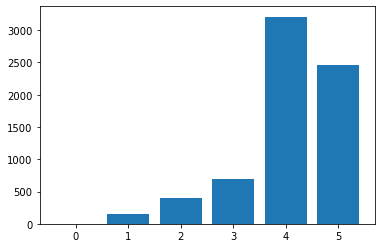

In [38]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [39]:
#this suggests features 3,4 and 5 are independent from the target, trying again using only those feautres


In [40]:
#Narrowing down features
gen_health2_df = gen_health_df.drop(["INCOME2","_EDUCAG","_VEGESU1"], axis=1)

In [41]:
# Define the target set.
y = gen_health2_df["GENHLTH"].values
y[:5]

<IntegerArray>
[4, 3, 2, 3, 2]
Length: 5, dtype: Int32

In [42]:
#Define the features set
X = gen_health2_df.drop("GENHLTH", axis=1)
X

,PAFREQ1_,STRFREQ_,_AGE80
1,0.47,0.0,70.0
2,1.00,2.0,67.0
6,2.00,3.0,71.0
9,2.00,0.0,77.0
11,5.00,3.0,70.0
...,...,...,...
418256,0.70,0.0,33.0
418257,1.00,0.0,65.0
418264,5.00,0.0,53.0
418265,7.00,0.0,19.0


In [43]:
for m,p in zip(models, params):
         oraculo(gen_health2_df.drop('GENHLTH',axis=1),
                 gen_health2_df['GENHLTH'], m, p)

Estimador:  LinearRegression()
Mean Absolute Error: 0.8220
Accuracy: 0.3705

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.24      0.00      0.00     12342
           2       0.38      0.75      0.51     24711
           3       0.34      0.29      0.31     19779
           4       0.00      0.00      0.00      6910
           5       0.00      0.00      0.00      1783

    accuracy                           0.37     65525
   macro avg       0.16      0.17      0.14     65525
weighted avg       0.29      0.37      0.29     65525


Done!




C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\

Estimador:  LogisticRegression()
Mean Absolute Error: 0.7848
Accuracy: 0.3766

              precision    recall  f1-score   support

           1       0.17      0.00      0.01     12342
           2       0.38      1.00      0.55     24711
           3       0.00      0.00      0.00     19779
           4       0.00      0.00      0.00      6910
           5       0.00      0.00      0.00      1783

    accuracy                           0.38     65525
   macro avg       0.11      0.20      0.11     65525
weighted avg       0.17      0.38      0.21     65525


Done!




C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Estimador:  LogisticIT()
Mean Absolute Error: 0.7813
Accuracy: 0.3776

              precision    recall  f1-score   support

           1       0.16      0.00      0.00     12342
           2       0.38      0.98      0.55     24711
           3       0.37      0.02      0.04     19779
           4       0.00      0.00      0.00      6910
           5       0.00      0.00      0.00      1783

    accuracy                           0.38     65525
   macro avg       0.18      0.20      0.12     65525
weighted avg       0.29      0.38      0.22     65525


Done!




C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Estimador:  LogisticAT()
Mean Absolute Error: 0.7759
Accuracy: 0.3764

              precision    recall  f1-score   support

           1       0.19      0.00      0.00     12342
           2       0.38      0.87      0.53     24711
           3       0.34      0.15      0.21     19779
           4       0.00      0.00      0.00      6910
           5       0.00      0.00      0.00      1783

    accuracy                           0.38     65525
   macro avg       0.18      0.21      0.15     65525
weighted avg       0.28      0.38      0.26     65525


Done!




C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elizk\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ordinal Log Reg and Feature Selection (Coefficients to determine feat select order)

In [44]:
# Define the target set.
y = mental_ml_df["_RFBMI5"].values
y[:5]

<IntegerArray>
[1, 2, 2, 1, 1]
Length: 5, dtype: Int32

In [45]:
#Define the features set
X = mental_ml_df.drop("_RFBMI5", axis=1)
X

,INCOME2,_EDUCAG,_VEGESU1,PAFREQ1_,STRFREQ_,_AGE80
1,5.0,3.0,1.21,0.47,0.0,70.0
2,7.0,4.0,1.64,1.00,2.0,67.0
6,7.0,4.0,1.34,2.00,3.0,71.0
9,5.0,2.0,1.92,2.00,0.0,77.0
11,7.0,4.0,3.10,5.00,3.0,70.0
...,...,...,...,...,...,...
418256,3.0,3.0,1.53,0.70,0.0,33.0
418257,1.0,1.0,0.15,1.00,0.0,65.0
418264,1.0,1.0,1.42,5.00,0.0,53.0
418265,3.0,2.0,0.55,7.00,0.0,19.0


#produce confusion matrix and extracting precision etc are important but itc it's more important to figure out which features have the greatest effect on the target itc i need the extimates of the interceptand the coefficients of the variables from the line converted from the s shaped line depicting the log of odds 
A variables significance of the coefficient which tells you the impact one unit increase in a feature in the log of odds of classifying the target 
first 
then take all significant features and run them in combinations and use the r squared to determine the most effective combinations 

read on the difference in how r squared is calculated in log reg vs lin reg
I want to figure out what is the max likelihood (the criteria upon which a particular line will be selected over another (it's different that linear regression)

a confusion matrix will be valuable in it's own right

In [46]:
#the above are for logistic reg in general, make sure it also applies to ordinal logistic reg just in case 

roc curve and area under the curve (auc) (don't implement here but take into consideration

In [47]:
#SAS JMP!!! i forgot about that

#Scaling and using 'INCOME2', '_EDUCAG', '_VEGESU1', '_BMI5', 'PAFREQ1_', 'STRFREQ_', '_AGE80', _IMPRACE, _STATE
- Mean squared error: 49.22 
- R Squared: 0.07
- Adjusted R squared: 0.06956
- Root Means Squared Error: 7.0158
#Scaling and using 'INCOME2', '_EDUCAG', '_VEGESU1', '_BMI5', 'PAFREQ1_', 'STRFREQ_', '_AGE80'
- Mean squared error: 49.25
- R Squared: 0.07
- Adjusted R squared: 0.06871
- Root Means Squared Error: 7.01799
#Scaling and using 'INCOME2', '_EDUCAG', '_VEGESU1', '_BMI5', '_AGE80'
- Mean squared error: 59.96
- R Squared: 0.07
- Adjusted R squared: 0.06966
- Root Means Squared Error: 7.74336


In [48]:
feature_analysis_df = pd.read_csv('Data/feat_analysis_health_behaviour.csv')